In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from supabase import create_client, Client

In [3]:
# Read the df_zoho_form_cleaned and store in a variable
df_analysis_per_tech = pd.read_csv('C:\\Language_Projects\\Language_Projects\\Python\\Flagship_1\\automotive_diagnostic_data_analysis\\data\\df_zoho_google_cleaned.csv')

In [4]:
# Convert the string data to datetime type
df_analysis_per_tech['created_time'] = pd.to_datetime(df_analysis_per_tech['created_time'])

In [5]:
# Sort the df through the datetime
df_analysis_per_tech_sorted = df_analysis_per_tech.sort_values('created_time')

In [6]:
# Reset index after sortting
df_analysis_per_tech_reset_index = df_analysis_per_tech_sorted.reset_index(drop=True)

In [7]:
# Print the first 10 rows of the column created_time
df_analysis_per_tech_reset_index['created_time'].head(10)

0   2022-10-30 09:47:00
1   2022-11-24 10:01:00
2   2023-07-24 08:37:00
3   2023-10-04 11:50:00
4   2023-11-13 11:01:00
5   2024-02-27 13:03:00
6   2024-03-01 05:09:00
7   2024-03-15 07:42:00
8   2024-04-02 12:37:00
9   2024-04-06 07:55:00
Name: created_time, dtype: datetime64[ns]

There are only 5 diagnostic entries from 2022 and 2023. Therefore, the analysis will be conducted considering only the years 2024 and 2025.

In [8]:
# Count the entries done in 2024
diagnostic_2024 = (df_analysis_per_tech_reset_index['created_time'].dt.to_period('Y') == '2024').value_counts()

In [9]:
# Print the values
diagnostic_2024

created_time
True     3388
False    1964
Name: count, dtype: int64

In [10]:
# Count the entries done in 2024
diagnostic_2025 = (df_analysis_per_tech_reset_index['created_time'].dt.to_period('Y') == '2025').value_counts()

In [11]:
# Print the values
diagnostic_2025

created_time
False    3393
True     1959
Name: count, dtype: int64

In [12]:
# Create a df with the 2024 entries
df_analysis_per_tech_2024 = df_analysis_per_tech_reset_index[df_analysis_per_tech_reset_index['created_time'].dt.to_period('Y') == '2024']

In [13]:
# Create a df with the 2024 entries
df_analysis_per_tech_2025 = df_analysis_per_tech_reset_index[df_analysis_per_tech_reset_index['created_time'].dt.to_period('Y') == '2025']

In [14]:
# Print the columns to confirm their names
df_analysis_per_tech_2024.columns

Index(['created_time', 'h_number', 'entry_type', 'technician', 'source',
       'year', 'make', 'model', 'engine_size', 'hdw_number', 'part_number',
       'notes', 'original_problems', 'original_dtcs', 'fs1_ecu_problems',
       'fs1_dtcs', 'fs1_original_problems_related', 'additional_notes',
       'resolution'],
      dtype='object')

In [15]:
# Function to create a dataframe to show the counted entries / tech
def count_tech_entry(df_analysis_per_tech_year):
    entries_per_tech_counted_year = df_analysis_per_tech_year['technician'].value_counts()
    df_count_entries_tech_year = pd.DataFrame({'Technician': entries_per_tech_counted_year.index, 'Quantity': entries_per_tech_counted_year.values})
    return df_count_entries_tech_year

In [16]:
# Function to create a chart to show the counted entries / tech
def create_chart(year, df):
    plt.figure(figsize=[8, 4])
    bar_tech_2024 = plt.bar(df['Technician'], df['Quantity'], color='blue')
    plt.xlabel('Technician', fontdict={'weight': 'bold', 'color': 'black'})
    plt.ylabel('Quantity', fontdict={'weight': 'bold', 'color': 'black'})
    plt.title(f'Diagnostic Performance {year} / Technician', fontdict={'weight': 'bold', 'color': 'black'})
    plt.bar_label(bar_tech_2024)
    return plt.show()

In [17]:
# Call the function to create a df with 2024 entries
df_count_entries_tech_2024 = count_tech_entry(df_analysis_per_tech_2024)

In [18]:
# Call the function to create a df with 2024 entries
df_count_entries_tech_2025 = count_tech_entry(df_analysis_per_tech_2025)

TECH PERFORMANCE IN 2024

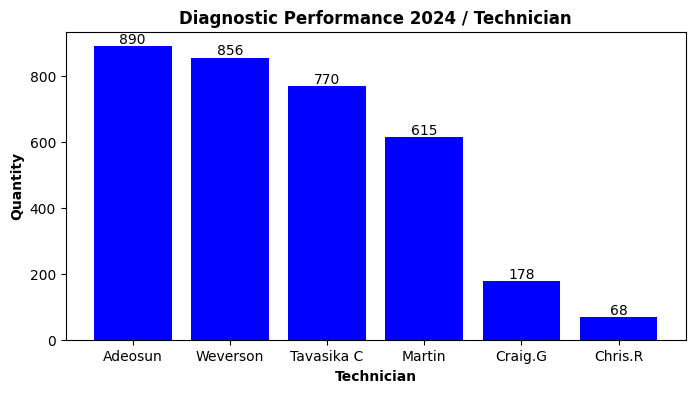

In [19]:
# Print the 2024 chart 
create_chart(2024, df_count_entries_tech_2024)

TECH PERFORMANCE IN 2025

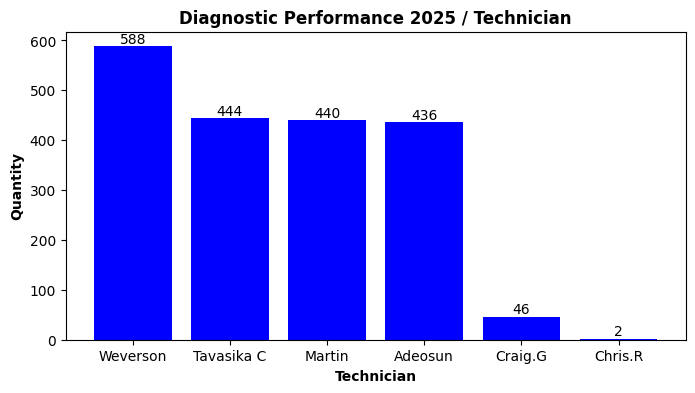

In [20]:
# Print the 2025 chart
create_chart(2025, df_count_entries_tech_2025)